In [0]:
import pandas as pd
from google.colab import files
uploaded = files.upload()


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['trumptweets.csv']))
df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN


In [0]:
#!pip install nltk

In [0]:
import nltk
nltk.download()

In [0]:
df.sort_values(by='date', ascending=False)

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
41121,1219076533354037249,https://twitter.com/realDonaldTrump/status/121...,A great show! Check it out tonight at 9pm. @ F...,2020-01-20 02:57:49,7947,34902,@,NaN,NaN
41120,1219066007731310593,https://twitter.com/realDonaldTrump/status/121...,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,@ @ @,NaN,NaN
41119,1219053709428248576,https://twitter.com/realDonaldTrump/status/121...,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,NaN,#,NaN
41118,1219004689716412416,https://twitter.com/realDonaldTrump/status/121...,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,NaN,NaN,NaN
41117,1218962544372670467,https://twitter.com/realDonaldTrump/status/121...,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN


In [0]:
oldtweets = df[['id','date','content','retweets','favorites']].sort_values(by='date', ascending=False)
oldtweets.head()

,id,date,content,retweets,favorites
41121,1219076533354037249,2020-01-20 02:57:49,a great show! check it out tonight at 9pm. @ f...,7947,34902
41120,1219066007731310593,2020-01-20 02:16:00,"“in the house, the president got less due proc...",20599,81921
41119,1219053709428248576,2020-01-20 01:27:07,i was thrilled to be back in the great state o...,16588,66944
41118,1219004689716412416,2020-01-19 22:12:20,now mini mike bloomberg is critical of jack wi...,36239,149571
41117,1218962544372670467,2020-01-19 19:24:52,i have never seen the republican party as stro...,32620,213817


In [0]:
def standardize_text(df, text_field):
    # normalize by turning all letters into lowercase
    df[text_field] = df[text_field].str.lower()
    return df


# call the text cleaning function
cleantext = standardize_text(oldtweets, "content")


In [0]:
## [PREPROCESS] Tokenize

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

cleantext["tokens"] = cleantext["content"].apply(tokenizer.tokenize)
cleantext.head()

,id,date,content,retweets,favorites,tokens
41121,1219076533354037249,2020-01-20 02:57:49,a great show! check it out tonight at 9pm. @ f...,7947,34902,"[a, great, show, check, it, out, tonight, at, ..."
41120,1219066007731310593,2020-01-20 02:16:00,"“in the house, the president got less due proc...",20599,81921,"[in, the, house, the, president, got, less, du..."
41119,1219053709428248576,2020-01-20 01:27:07,i was thrilled to be back in the great state o...,16588,66944,"[i, was, thrilled, to, be, back, in, the, grea..."
41118,1219004689716412416,2020-01-19 22:12:20,now mini mike bloomberg is critical of jack wi...,36239,149571,"[now, mini, mike, bloomberg, is, critical, of,..."
41117,1218962544372670467,2020-01-19 19:24:52,i have never seen the republican party as stro...,32620,213817,"[i, have, never, seen, the, republican, party,..."


In [0]:
#Lemmatizing
wn=nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
  text = [wn.lemmatize(word) for word in tokenized_text]
  return text
  

#Stemming
ps = nltk.PorterStemmer()
def stemming(tokenized_text):
  text = [ps.stem(word) for word in tokenized_text]
  return text

table = cleantext
#table['processed'] = table['tokens'].apply(lambda x: stemming(x))
table['processed'] = table['tokens'].apply(lambda x: lemmatizing(x))
table.head()

,id,date,content,retweets,favorites,tokens,processed
41121,1219076533354037249,2020-01-20 02:57:49,a great show! check it out tonight at 9pm. @ f...,7947,34902,"[a, great, show, check, it, out, tonight, at, ...","[a, great, show, check, it, out, tonight, at, ..."
41120,1219066007731310593,2020-01-20 02:16:00,"“in the house, the president got less due proc...",20599,81921,"[in, the, house, the, president, got, less, du...","[in, the, house, the, president, got, le, due,..."
41119,1219053709428248576,2020-01-20 01:27:07,i was thrilled to be back in the great state o...,16588,66944,"[i, was, thrilled, to, be, back, in, the, grea...","[i, wa, thrilled, to, be, back, in, the, great..."
41118,1219004689716412416,2020-01-19 22:12:20,now mini mike bloomberg is critical of jack wi...,36239,149571,"[now, mini, mike, bloomberg, is, critical, of,...","[now, mini, mike, bloomberg, is, critical, of,..."
41117,1218962544372670467,2020-01-19 19:24:52,i have never seen the republican party as stro...,32620,213817,"[i, have, never, seen, the, republican, party,...","[i, have, never, seen, the, republican, party,..."


In [0]:
all_words = [word for tokens in cleantext["processed"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in cleantext["processed"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

861469 words total, with a vocabulary size of 45567


In [0]:
print (VOCAB[0:100])

# What are the most commonly occuring words
from collections import Counter
count_all_words = Counter(all_words)

# get the top 100 most common occuring words
count_all_words.most_common(100)

['0', '00', '000', '0002', '00021', '00022', '000hermansjr000', '000th', '000this', '005', '0062343971', '007cigarjoe', '007llisav', '0098a264184d', '00a', '00am', '00ame', '00d3ec5a', '00gnh9nlet', '00hol0to0u', '00mao6vk7r', '00p', '00patriot', '00pm', '00pme', '00pmest', '00rstw00', '00ykww_bq2i', '01', '01101o10', '0114', '01am', '01c8isgdb3', '01tj2erbe7jxdt91', '02', '020215', '0207', '022pjwhhjs', '03', '032', '0324760ca856_story', '036', '03d039e997c2', '03ddyvu6ha', '03slex', '03uzbgcswb', '04', '040', '040715_trumpferrypoint', '041ccb32', '044xgnylth', '04qqpgylt7', '05', '050urjw3ay', '05ce', '05fxdli', '05xrx2odxn', '06', '0624152016iranweb', '062clmcqan', '065ba39beb30', '067', '06wj5cdqjee', '07', '071', '071017924', '075', '07_aoamhqe', '08', '081', '0822', '08fmnhytac', '08xkebd8be', '09', '0900', '092t2vrmew', '0930', '09a7998e75f145e', '09bac03rx6', '0a25gapyj6', '0a7apd4kuo', '0angxb2bri', '0auxm3mkpr', '0bama', '0bf7bolwej', '0bstlvq7v9', '0bt2jyormn', '0c004f23943c

[('the', 32400),
 ('to', 18680),
 ('a', 16907),
 ('and', 14681),
 ('of', 12450),
 ('is', 12138),
 ('in', 11362),
 ('i', 10306),
 ('you', 10236),
 ('for', 9441),
 ('realdonaldtrump', 8741),
 ('on', 7805),
 ('com', 7311),
 ('s', 7164),
 ('http', 7138),
 ('it', 6897),
 ('be', 6691),
 ('trump', 6438),
 ('great', 6274),
 ('will', 6191),
 ('that', 5838),
 ('are', 5262),
 ('with', 4868),
 ('twitter', 4768),
 ('we', 4665),
 ('t', 4449),
 ('have', 4312),
 ('our', 4129),
 ('he', 4123),
 ('at', 4051),
 ('my', 3621),
 ('this', 3575),
 ('they', 3475),
 ('not', 3269),
 ('wa', 3216),
 ('all', 3183),
 ('president', 2987),
 ('ha', 2896),
 ('by', 2866),
 ('thank', 2789),
 ('so', 2756),
 ('u', 2747),
 ('just', 2589),
 ('your', 2572),
 ('people', 2526),
 ('pic', 2375),
 ('can', 2367),
 ('donald', 2332),
 ('very', 2319),
 ('thanks', 2314),
 ('no', 2276),
 ('do', 2205),
 ('me', 2197),
 ('country', 2170),
 ('but', 2137),
 ('from', 2115),
 ('who', 2096),
 ('what', 2084),
 ('www', 2068),
 ('get', 2036),
 ('tim

In [0]:
unwantedwords='!@#"', 'realDonaldTrump','realdonaldtrump', 'Donald', '.', '&', '-', 'A', '"', 'the', '','com', 'http'
clean_words=all_words
for char in unwantedwords:
    clean_words = [w.replace(char,"") for w in clean_words]

count_all_words = Counter(clean_words)

# get the top 100 most common occuring words
count_all_words.most_common(100)

[('', 55591),
 ('to', 18682),
 ('a', 16908),
 ('and', 14681),
 ('of', 12450),
 ('is', 12138),
 ('in', 11363),
 ('i', 10306),
 ('you', 10236),
 ('for', 9441),
 ('on', 7805),
 ('s', 7167),
 ('it', 6901),
 ('be', 6691),
 ('trump', 6440),
 ('great', 6274),
 ('will', 6191),
 ('that', 5838),
 ('are', 5262),
 ('with', 4868),
 ('twitter', 4768),
 ('we', 4665),
 ('t', 4449),
 ('have', 4312),
 ('our', 4129),
 ('he', 4123),
 ('at', 4053),
 ('my', 3621),
 ('this', 3575),
 ('y', 3526),
 ('not', 3269),
 ('wa', 3216),
 ('all', 3183),
 ('president', 2990),
 ('ha', 2896),
 ('by', 2866),
 ('thank', 2789),
 ('so', 2756),
 ('u', 2747),
 ('just', 2589),
 ('your', 2572),
 ('people', 2526),
 ('pic', 2376),
 ('can', 2367),
 ('donald', 2341),
 ('very', 2319),
 ('thanks', 2314),
 ('no', 2276),
 ('re', 2236),
 ('me', 2210),
 ('do', 2205),
 ('country', 2170),
 ('m', 2161),
 ('or', 2143),
 ('but', 2137),
 ('from', 2115),
 ('who', 2096),
 ('what', 2084),
 ('www', 2068),
 ('get', 2036),
 ('time', 1996),
 ('his', 198

In [0]:
from nltk.corpus import stopwords
sr= stopwords.words('english')
clean_tokens = clean_words

clean_tokens = [token for token in clean_tokens if token not in sr]
clean_tokens = [token for token in clean_tokens if token]
#for token in clean_words:
    #if token in sr:
        #clean_tokens.remove(token)
clean_tokens

['great',
 'show',
 'check',
 'tonight',
 '9pm',
 'foxnewss',
 'twitter',
 'nextrevfnc',
 'status',
 '1218941188704632832',
 'house',
 'president',
 'got',
 'le',
 'due',
 'process',
 '9',
 '11',
 'terrorist',
 'got',
 'corrupt',
 'process',
 'mark',
 'levin',
 'marklevinshow',
 'much',
 'repdougcollins',
 'foxnews',
 'wa',
 'thrilled',
 'back',
 'great',
 'state',
 'texas',
 'tonight',
 'people',
 'known',
 'tough',
 'strong',
 'hardworking',
 'loyal',
 'fiercely',
 'patriotic',
 'like',
 'america',
 'incredible',
 'farmer',
 'afbf2020s',
 'www',
 'pscp',
 'tv',
 'w',
 'cptqejfvtlfstfjub1dwuxd8mux5eejmv09yyllhtlrz',
 '5nbv2gpekookdem8yurjh1yctdrkh2jvptj_se1',
 '5m20s',
 'mini',
 'mike',
 'bloomberg',
 'critical',
 'jack',
 'wilson',
 'saved',
 'perhaps',
 'hundred',
 'people',
 'church',
 'wa',
 'carrying',
 'gun',
 'knew',
 'use',
 'jack',
 'quickly',
 'killed',
 'shooter',
 'wa',
 'beginning',
 'rampage',
 'mini',
 '2nd',
 'ad',
 'fake',
 'like',
 'never',
 'seen',
 'republican',
 '

![](https://drive.google.com/uc?id=1Z2Sr70L-Dj_JNGHlnV-WLGlfPigt-8pW)

In [0]:
tagged = nltk.pos_tag(clean_tokens)
tagged[0:10]

[('great', 'JJ'),
 ('show', 'NN'),
 ('check', 'VB'),
 ('tonight', 'JJ'),
 ('9pm', 'CD'),
 ('foxnewss', 'JJ'),
 ('twitter', 'NN'),
 ('nextrevfnc', 'NN'),
 ('status', 'NN'),
 ('1218941188704632832', 'CD')]

<class 'list'>
          word  freq tag
218      trump  6440  NN
0        great  6274  JJ
6      twitter  4768  NN
26          wa  3216  NN
11   president  2990  NN


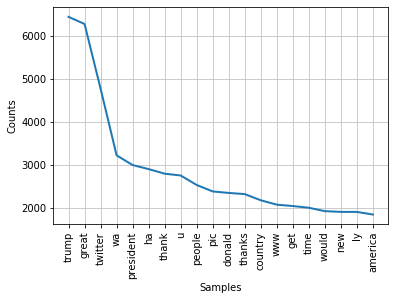

In [0]:
freq = nltk.FreqDist(clean_tokens)
freqtable = list(freq.items())
print(type(freqtable))
freqtable = pd.DataFrame(data=freqtable, columns=['word','freq'])
freqtable['tag'] = (nltk.pos_tag(freqtable['word']))
freqtable['tag'] = [str(i) for i in freqtable['tag'].str[1]]
freqtable = freqtable.sort_values(by='freq',ascending=False)
print(freqtable.head())
#freqtable = [str(key) + ':' + str(val) for key,val in freq.items()]
#freqtable = pd.DataFrame(data=freqtable, columns=['word'])
#freqtable['freq']=freqtable['word'].str.split(':').str[1]
#freqtable['word']=freqtable['word'].str.split(':').str[0]
#freqtable.head()
#print(freqtable[0:6])
#for key,val in freq.items():
    #print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer='char_wb')
X_counts = count_vect.fit_transform(freqtable['word'])
print(X_counts.shape)
print(count_vect.get_feature_names())

(45420, 94)
[' ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'º', '½', 'á', 'â', 'è', 'é', 'í', 'ï', 'ñ', 'ó', 'ô', 'ö', 'ø', 'ú', 'ğ', 'ı', 'ĺ', 'ō', 'آ', 'ؤ', 'ا', 'ب', 'ت', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي', 'چ', 'ژ', 'ک', 'گ', 'ی', '۰', '۴', 'ễ', 'ｒ', 'ｔ']


In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

ValueError: ignored